In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the one-hot-encoded data
movie_data = pd.read_csv("add_imdb_utf8_fixruntime.csv")

In [4]:
movie_data.head()

,poster_path,title,release_date,overview,popularity,original_title,backdrop_path,vote_count,video,adult,...,10749,10751,10752,10770,release_year,imdb_id,imdb_title,runtime,director,aspect_ratio
0,/5E99Ucwf5JJ9iDzARNk0mizQ8bN.jpg,WWE: The True Story of WrestleMania,3/13/11,It is the most anticipated yearly event in Spo...,1.132434,WWE: The True Story of WrestleMania,/yGUzOJqrHbiMl3KMxb7maD8Eat0.jpg,3.0,FALSE,FALSE,...,0.0,0.0,0.0,0.0,2011.0,1843301,The True Story of WrestleMania,122.0,Kevin Dunn,1.33 : 1
1,/mQqPsqE1ZVfc2rgQ1grnPb1hI1E.jpg,The Music Never Stopped,3/18/11,Henry struggles to bond with his estranged son...,1.414362,The Music Never Stopped,/6fMQCfmsqdhhlcNx6FdleX6zTXG.jpg,40.0,FALSE,FALSE,...,0.0,0.0,0.0,0.0,2011.0,1613062,The Music Never Stopped,105.0,Jim Kohlberg,2.35 : 1
2,/78DFS4QcjCBi89NtiEqAROpSkIz.jpg,Roman Polanski: A Film Memoir,9/27/11,An interview with film director Roman Polanski...,1.034842,Roman Polanski: A Film Memoir,/y0wy89A4tl9Ldf7pGMcWkdZ9cMo.jpg,9.0,FALSE,FALSE,...,0.0,0.0,0.0,0.0,2011.0,2079571,Roman Polanski: A Film Memoir,90.0,Laurent Bouzereau,NaN
3,/8CJJv7DJCxglkXqkvzmgMb5TMwD.jpg,Wings of Life,3/16/11,A beautiful love story in danger. Our future d...,1.128282,Wings of Life,/sIdz0BLKO1LxDRGBrvqFcJMTwkp.jpg,8.0,FALSE,FALSE,...,0.0,0.0,0.0,0.0,2011.0,1222816,Disneynature: Wings of Life,81.0,Louie Schwartzberg,NaN
4,/3tWdaS3t7UkH1q48qs9GhSa9dBD.jpg,X-Ray Earth,5/22/11,From the churning interior to the oceans and l...,1.014832,X-Ray Earth,/rWr02A6nzAdaXBkkWvpXhWeb63Y.jpg,0.0,FALSE,FALSE,...,0.0,0.0,0.0,0.0,2011.0,1845893,X-Ray Earth,120.0,NaN,NaN


In [5]:
# apply bag-of-words to movie titles
# eliminate common stop words
vectorizer = CountVectorizer(stop_words='english')

# apply to movie titles
corpus_title = movie_data['title'].values
# apply to movie overview
corpus_overview = movie_data['overview'].values

In [6]:
#obtain the index that caused the encoding error
bad_title_index = []
for i in range(len(corpus_title)):
    try:
        corpus_title[i].encode('utf-8')
    except:
        bad_title_index.append(i)

In [7]:
#obtain the index that caused the encoding error
bad_ov_index = []
for i in range(len(corpus_overview)):
    try:
        corpus_overview[i].encode('utf-8')
    except:
        bad_ov_index.append(i)

In [8]:
#check the bad title index
print len(bad_title_index)
print bad_title_index

64
[58, 139, 167, 174, 286, 398, 628, 685, 777, 889, 976, 987, 1002, 1082, 1183, 1207, 1689, 1712, 1728, 1753, 1777, 2023, 2030, 2109, 2233, 2358, 2483, 2532, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2690, 2867, 2871, 2952, 2991, 3056, 3188, 3251, 3254, 3286, 3540, 3571, 3772, 3898, 4105, 4268, 4338, 4348, 4681, 5329, 5353, 5644, 5708, 5817, 5864, 5878, 5909]


In [9]:
#check the bad overview index
print len(bad_ov_index)
# print bad_ov_index

1119


**Comments:**
When we first explored the number of movie titles with encoding errors, it seems only a moderate amount of movie titles have thie issue. However, when it comes to the movie overview, there is an extensive number of movie overviews which has encoding problems. Thus, it is decided that we cannot simply decided the movies with error and instead we should only remove the problematic words.

In [10]:
#find the index of movie titles with nan
null_title_index = []

for i in range(len(corpus_title)):
    if str(corpus_title[i]) == "nan":
        null_title_index.append(i)
        
print null_title_index
#check if the index is correct
print corpus_title[null_title_index]

#encode nan as missingval
#use 'missingval' but not 'missing' because 'missing' can really appear in movie titles
corpus_title[null_title_index] = 'missingval'
#check if encoding is correct
print corpus_title[null_title_index]

[2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590]
[nan nan nan nan nan nan nan nan nan]
['missingval' 'missingval' 'missingval' 'missingval' 'missingval'
 'missingval' 'missingval' 'missingval' 'missingval']


In [11]:
# #create a list that does not contain the null index
# bad_title_index_notnan = list(Set(bad_title_index) - Set(null_title_index))


In [12]:
#find the index of movie titles with nan
null_ov_index = []

for i in range(len(corpus_overview)):
    if str(corpus_overview[i]) == "nan":
        null_ov_index.append(i)
        
print null_ov_index
#check if the index is correct
print corpus_overview[null_ov_index]

#encode nan as missingval
#use 'missingval' but not 'missing' because 'missing' can really appear in movie titles
corpus_overview[null_ov_index] = 'missingval'
#check if encoding is correct
print corpus_overview[null_ov_index]

[62, 175, 274, 442, 528, 542, 908, 1253, 1290, 1313, 1365, 1547, 1948, 2106, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2950, 3357, 3433, 3552, 3693, 3846, 4330, 4912, 5018, 5114, 5179, 5282, 5293, 5433, 5717, 5848, 5924]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
['missingval' 'missingval' 'missingval' 'missingval' 'missingval'
 'missingval' 'missingval' 'missingval' 'missingval' 'missingval'
 'missingval' 'missingval' 'missingval' 'missingval' 'missingval'
 'missingval' 'missingval' 'missingval' 'missingval' 'missingval'
 'missingval' 'missingval' 'missingval' 'missingval' 'missingval'
 'missingval' 'missingval' 'missingval' 'missingval' 'missingval'
 'missingval' 'missingval' 'missingval' 'missingval' 'missingval'
 'missingval' 'missingval' 'missingval' 'missingval' 'missingval']


In [13]:
for i in bad_title_index:
    bad_title = corpus_title[i].split()
    for s in bad_title:
        try:
            m = s.encode('utf-8')
        except:
            bad_title.remove(s)
    
    #re-join the words with the problematic words being removed
    corpus_title[i] = " ".join(bad_title)          
    print corpus_title[i]     

Attack of La
Irene Huss 7: Den Som Vakar I
Dedemin
The Is Ours Vol 1 Everywhere Further Than Everyplace Else
Live At Roseland - Elements Of 4
Las razones del
a mirror in the sky
Suite The Movie: Take it back! The Miraculous Melody that Connects Hearts!
Die
El de Budapest
Rihanna The Loud Tour at Rock in Rio
Les tribulations d'une
Kamen Rider Super Sentai: Super Hero Taihen Who�۪s the culprit?!
Berlin
Magnus IV
Nightmare - Painajainen
La rusa
Les
El magnate
A Tale 2: Escape From Paradise
Die schlagen
and Fufu's Great Adventure: Save the Seven-Colored Flower!
Los
You, Planet An Exploration in 3D
Guten Tag,
Good Freda
Kedi
Radical - The Controversial Saga of Figueiredo
missingval
missingval
missingval
missingval
missingval
missingval
missingval
missingval
missingval
Wilde
K��rm��z��
Hititya Madalyonun
Minha ̩ uma
The Rendez-Vous of
Canon (Fidelidad al

- Mrs Carter Show Tour HBO
The Line
12 Boys
Waiting. Love
quien pueda
Wide Boyz II Slender Gentlemen
Suite
3 Minutes, 10 Bullets
Ouragan, 

In [14]:
bad_title_unfixed_index =[]
for i in range(len(corpus_title)):
    try:
        corpus_title[i].encode('utf-8')
    except:
        print corpus_title[i]
        bad_title_unfixed_index.append(i)

Kamen Rider Super Sentai: Super Hero Taihen Who�۪s the culprit?!
K��rm��z��
Minha ̩ uma


In [15]:
for i in bad_title_unfixed_index:
    bad_title = corpus_title[i].split()

    for s in bad_title:
        try:
            m = s.encode('utf-8')
        except:

            bad_title.remove(s)
        
    corpus_title[i] = " ".join(bad_title)          
    print corpus_title[i]   

Kamen Rider Super Sentai: Super Hero Taihen the culprit?!

Minha uma


In [16]:
title_counts = vectorizer.fit_transform(corpus_title)
# convert to array
title_counts = title_counts.toarray()

# word list for title
title_words = vectorizer.get_feature_names()
title_words = np.asarray(title_words)

In [17]:
title_counts_df = pd.DataFrame(title_counts)
title_counts_df.columns = title_words
title_counts_df.head()

,000,0014,0069,0s,10,100,1000,102,104,107,...,zombi,zombie,zombies,zombinator,zona,zookeeper,zoom,zoombies,zoritsa,zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
word_count = title_counts_df.sum(axis=0)
word_count.sort(ascending=False, inplace=False)

/Users/Cynthia9109/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


christmas            120
love                  93
live                  71
story                 65
movie                 63
man                   55
life                  54
dead                  47
night                 47
girl                  41
dark                  40
vs                    39
day                   36
big                   36
time                  34
house                 32
road                  31
star                  30
world                 30
blood                 29
home                  27
little                27
new                   25
american              25
days                  25
mr                    25
girls                 24
black                 23
white                 23
king                  22
                    ... 
loosies                1
lopez                  1
lorax                  1
thirst                 1
lore                   1
thinning               1
lose                   1
losers                 1
loserville             1


In [19]:
#append the count for each word at the end
title_counts_df = title_counts_df.append(word_count, ignore_index=True)
#change the index name to be more informative
title_counts_df=title_counts_df.rename(index = {6007:'sum'})

In [20]:
title_counts_df.tail()

,000,0014,0069,0s,10,100,1000,102,104,107,...,zombi,zombie,zombies,zombinator,zona,zookeeper,zoom,zoombies,zoritsa,zulu
6003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sum,3,1,1,1,9,6,2,1,1,1,...,1,16,7,1,1,1,1,1,1,1


In [21]:
#sort dataframe by the value of the last row
new_columns = title_counts_df.columns[title_counts_df.ix[title_counts_df.last_valid_index()].argsort()]
title_counts_df = title_counts_df[new_columns]
#reverse the columns order
title_counts_df = title_counts_df[title_counts_df.columns[::-1]]

In [22]:
title_counts_df.tail()

,christmas,love,live,story,movie,man,life,dead,night,girl,...,logic,thorberg,longwood,tho,loneliest,lonesome,thirty,longhorns,longwave,zulu
6003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sum,120,93,71,65,63,55,54,47,47,41,...,1,1,1,1,1,1,1,1,1,1


In [25]:
#clean the overview data 10 times
for j in range(10):
    bad_ov_unfixed_index =[]
    for i in range(len(corpus_overview)):
        try:
            corpus_overview[i].encode('utf-8')
        except:
            bad_ov_unfixed_index.append(i)

    for k in bad_ov_unfixed_index:
        bad_overview = corpus_overview[k].split()
        for s in bad_overview:
            try:
                m = s.encode('utf-8')
            except:
                bad_overview.remove(s)
        #re-join the words with the problematic words being removed
        corpus_overview[k] = " ".join(bad_overview)            

In [26]:
#check the fixed bad overview
corpus_overview[bad_ov_index][:5]

array([ 'When industrious high school gamer Zach Taylor lands a prized scholarship to the prestigious Digital Institute of Game Design (DIGD), his future breaks wide open. The opportunity to study under gaming legend Marcus Bentton and alongside the most creative minds will certainly propel him into a successful career as a video game designer. That is, if he can pass the infamous freshman project that eliminates more than half of the class within the first three months.',
       'En ung vacker kvinna hittas i och fingret hon en vigselring som annan. Irene Huss och hennes kollegor fallet och direkt problem. Obduktionen visar att inte drunkning utan en skallskada. Vem hon? Hon inte saknad, ingen kan identifiera henne, ingen vet Samtidigt i ett sitter en misshandlad man och ruvar en hemlighet... Angela i rollen som Irene Huss. Vi Lasse Brandeby, Reuben Sallmander, Eric Ericson, Dag Malmberg och Anki Dessutom kommer en ny kriminaltekniker in i teamet i form av Moa Gammel bl a Sommaren med

In [27]:
overview_counts = vectorizer.fit_transform(corpus_overview)
# convert to array
overview_counts = overview_counts.toarray()

# word list for title
overview_words = vectorizer.get_feature_names()
overview_words = np.asarray(overview_words)

overview_counts_df = pd.DataFrame(overview_counts)
overview_counts_df.columns = overview_words
overview_counts_df.head()

,00,000,000km,007,00pm,01,02,03,04,05,...,zoozie,zorica,zoritsa,zou,zsalyne,zugormin,zugozorg,zul,zulkifli,zvrtne
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
overview_word_count = overview_counts_df.sum(axis=0)
#append the count for each word at the end
overview_counts_df = overview_counts_df.append(overview_word_count, ignore_index=True)
overview_counts_df.shape

(6008, 25531)

In [29]:
#change the index name to be more informative
overview_counts_df=overview_counts_df.rename(index = {6007:'sum'})

In [30]:
#sort dataframe by the value of the last row
ov_new_columns = overview_counts_df.columns[overview_counts_df.ix[overview_counts_df.last_valid_index()].argsort()]
overview_counts_df = overview_counts_df[ov_new_columns]
#reverse the columns order
overview_counts_df = overview_counts_df[overview_counts_df.columns[::-1]]
overview_counts_df.tail()

,life,new,world,film,story,young,family,man,love,time,...,ravishing,ravaging,esp,eskimo,raven,ravenna,ravings,escobar,eschews,zvrtne
6003,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sum,1173,999,883,785,781,750,705,600,586,538,...,1,1,1,1,1,1,1,1,1,1


In [35]:
import seaborn as sns

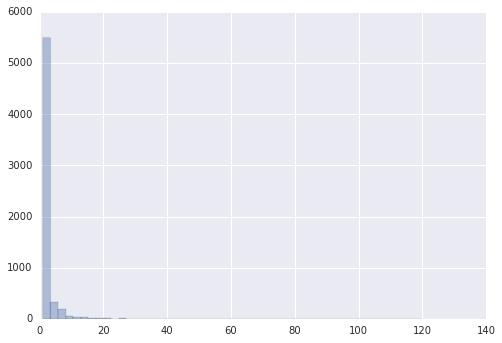

In [37]:
sns.distplot(word_count, kde=False, rug=False)

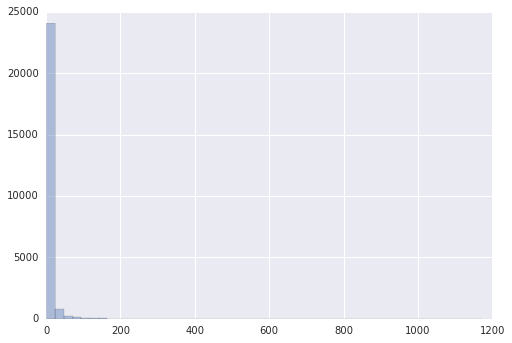

In [40]:
sns.distplot(overview_word_count, kde=False, rug=False)

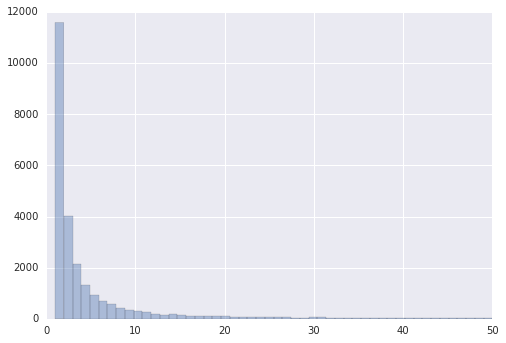

In [45]:
sns.distplot(overview_word_count, kde=False, rug=False, hist_kws={"range": [1,50]})

In [79]:
overview_word_count_truncated = []

for i in overview_word_count:
    if i > 200:
        overview_word_count_truncated.append(i)

In [80]:
len(overview_word_count_truncated)

66

In [83]:
if 

SyntaxError: invalid syntax (<ipython-input-83-ecd29d3b8052>, line 1)

In [61]:
float(len(overview_word_count_truncated))/float(len(overview_word_count))

0.06721240844463593

In [88]:
word_count_truncated = []

for i in word_count:
    if i > 30:
        word_count_truncated.append(i)
        
print len(word_count_truncated)

17


In [68]:
from sklearn.decomposition import PCA

In [69]:
PCA(overview_word_count)

PCA(copy=True,
  n_components=00            6
000          47
000km         1
007           1
00pm          1
01            5
02            4
03            4
04            2
05            5
06            5
07            2
08            1
09            4
0s            1
10           68
100          19
1000          3...      1
zugormin      1
zugozorg      2
zul           2
zulkifli      1
zvrtne        1
dtype: int64,
  whiten=False)

In [107]:
selected_title_counts_df = title_counts_df.iloc[:-1,:17]
selected_overview_counts_df = overview_counts_df.iloc[:-1,:66]

In [108]:
selected_title_counts_df.tail()

,christmas,love,live,story,movie,man,life,dead,night,girl,dark,vs,day,big,time,house,road
6002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
selected_title_counts_df.shape

(6007, 17)

In [110]:
selected_overview_counts_df.tail()

,life,new,world,film,story,young,family,man,love,time,...,small,movie,wife,long,discovers,relationship,follows,discover,come,goes
6002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6003,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6006,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
